In [55]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:75% !important; }</style>"))
import yaml
import os
import pandas as pd
import numpy as np
import seaborn as sns
from aequitas.group import Group
from aequitas.bias import Bias
from aequitas.fairness import Fairness
import aequitas.plot as ap
import matplotlib.pyplot as plt
sns.set() 
DPI = 200


In [12]:
datadir = os.path.join(os.getcwd(),'data/donors-choose/model_selection')

In [29]:
evals_df = pd.read_csv(os.path.join(datadir,'split2_evals.csv'))


In [32]:
evals_df.head(10)

,model_precision,model_classpath,hyperparameters,model_uuid,predictions_uuid,target_pp,matrix_type,matrix_start_date,matrix_end_date
0,0.552,sklearn.ensemble.RandomForestClassifier,"{""n_jobs"": -1, ""criterion"": ""gini"", ""max_depth...",a04e2eedd9c5ff18bcf77e84ae9db561,c598fbe93f4c218ac7d325fb478598f1,1000,test,2012-12-01,2013-01-31
1,0.551,sklearn.ensemble.RandomForestClassifier,"{""n_jobs"": -1, ""criterion"": ""gini"", ""max_depth...",3f8f65db414b74ba1c4773e131bdb51d,2d8e4d82f4e67e1de1de8650a7838fc2,1000,test,2012-12-01,2013-01-31
2,0.550,sklearn.ensemble.RandomForestClassifier,"{""n_jobs"": -1, ""criterion"": ""gini"", ""max_depth...",8823d053f9fbe6c34efdae3a2f24c39c,5e78e49f70fac0193eaadb8513428f23,1000,test,2012-12-01,2013-01-31
3,0.549,lightgbm.LGBMClassifier,"{""n_jobs"": -1, ""max_depth"": 2, ""num_leaves"": 5...",ffc7abef4fe933b0f0cfed63d5d03910,f04edad1446642411085e84271898506,1000,test,2012-12-01,2013-01-31
4,0.548,sklearn.ensemble.RandomForestClassifier,"{""n_jobs"": -1, ""criterion"": ""gini"", ""max_depth...",110d892ce37127a79d7c6e0eac9a5d13,09092f371176a13cddca59bac20da4fd,1000,test,2012-12-01,2013-01-31
5,0.547,sklearn.ensemble.RandomForestClassifier,"{""n_jobs"": -1, ""criterion"": ""entropy"", ""max_de...",856a91cee8d3e81d35b0c7578d8459cb,dc9f61602f5c90b70aa8e6040eaf2972,1000,test,2012-12-01,2013-01-31
6,0.544,sklearn.ensemble.RandomForestClassifier,"{""n_jobs"": -1, ""criterion"": ""gini"", ""max_depth...",9d582bc500e1d99e0949ec9d35ae8eb3,d3de1db6eed5cfab17d64d6a13e20c8d,1000,test,2012-12-01,2013-01-31
7,0.544,sklearn.ensemble.RandomForestClassifier,"{""n_jobs"": -1, ""criterion"": ""gini"", ""max_depth...",bcc12af1a0ae151aabd5238e3a4fb242,eb671681600d5304fce6873004c61c50,1000,test,2012-12-01,2013-01-31
8,0.543,sklearn.ensemble.RandomForestClassifier,"{""n_jobs"": -1, ""criterion"": ""gini"", ""max_depth...",7fa15e633491add493d45e9dc7440315,5bd60c3f912e6d62b9acf7b3a56ae803,1000,test,2012-12-01,2013-01-31
9,0.543,sklearn.ensemble.RandomForestClassifier,"{""n_jobs"": -1, ""criterion"": ""entropy"", ""max_de...",da8d97ec5529f435974e238b1b29cf7f,4cd560dcb70bfe5bfef3ad1628eaba8a,1000,test,2012-12-01,2013-01-31


In [31]:
evals_df['hyperparameters'][0]

'{"n_jobs": -1, "criterion": "gini", "max_depth": 30, "max_features": "sqrt", "n_estimators": 87, "random_state": 213500298, "min_samples_leaf": 44, "min_samples_split": 3}'

In [108]:
aequitas_df = pd.read_csv(os.path.join(datadir,'split2_aequitas.csv'))


In [34]:
aequitas_df.shape

(2475, 16)

In [35]:
aequitas_df.head(10)

,model_uuid,predictions_uuid,k,attribute_name,attribute_value,tpr,tpr_disparity,tpr_ref_group_value,pp,tp,group_label_pos,prev,group_size,matrix_type,matrix_start_date,matrix_end_date
0,a04e2eedd9c5ff18bcf77e84ae9db561,c598fbe93f4c218ac7d325fb478598f1,1000,poverty_level,low_moderate,0.168282,2.253859,high,439,191,1135,0.349338,3249,test,2012-12-01,2013-01-31
1,a04e2eedd9c5ff18bcf77e84ae9db561,c598fbe93f4c218ac7d325fb478598f1,1000,teacher_sex,female,0.102390,3.370670,male,951,527,5147,0.341042,15092,test,2012-12-01,2013-01-31
2,a04e2eedd9c5ff18bcf77e84ae9db561,c598fbe93f4c218ac7d325fb478598f1,1000,teacher_sex,male,0.030377,1.000000,male,49,25,823,0.318498,2584,test,2012-12-01,2013-01-31
3,a04e2eedd9c5ff18bcf77e84ae9db561,c598fbe93f4c218ac7d325fb478598f1,1000,teacher_sex,unknown,NaN,NaN,male,0,0,0,0.000000,1,test,2012-12-01,2013-01-31
4,a04e2eedd9c5ff18bcf77e84ae9db561,c598fbe93f4c218ac7d325fb478598f1,1000,metro_type,rural,0.235152,5.510384,urban,367,194,825,0.417088,1978,test,2012-12-01,2013-01-31
5,a04e2eedd9c5ff18bcf77e84ae9db561,c598fbe93f4c218ac7d325fb478598f1,1000,metro_type,suburban,0.088648,2.077317,urban,259,139,1568,0.346290,4528,test,2012-12-01,2013-01-31
6,a04e2eedd9c5ff18bcf77e84ae9db561,c598fbe93f4c218ac7d325fb478598f1,1000,metro_type,unknown,0.129412,3.032549,urban,182,99,765,0.372082,2056,test,2012-12-01,2013-01-31
7,a04e2eedd9c5ff18bcf77e84ae9db561,c598fbe93f4c218ac7d325fb478598f1,1000,metro_type,urban,0.042674,1.000000,urban,192,120,2812,0.308502,9115,test,2012-12-01,2013-01-31
8,a04e2eedd9c5ff18bcf77e84ae9db561,c598fbe93f4c218ac7d325fb478598f1,1000,poverty_level,high,0.074664,1.000000,high,561,361,4835,0.335112,14428,test,2012-12-01,2013-01-31
9,ffc7abef4fe933b0f0cfed63d5d03910,f04edad1446642411085e84271898506,1000,metro_type,rural,0.220606,4.278236,urban,347,182,825,0.417088,1978,test,2012-12-01,2013-01-31


In [43]:
poverty_tpr_disparity_df = aequitas_df[aequitas_df['attribute_name']=='poverty_level'].groupby(['model_uuid','attribute_name']).tpr_disparity.agg('max').to_frame().reset_index()

In [44]:
poverty_tpr_disparity_df.head()

,model_uuid,attribute_name,tpr_disparity
0,00cab6cf05cc9301393427c836cb0778,poverty_level,1.328478
1,00d27f7607f01baf18bdac06521bfb24,poverty_level,1.342918
2,01edb419977b7dc2462f0ca01120ed0e,poverty_level,1.708646
3,02483a56280e9cd240f805a8d140c2f4,poverty_level,2.612574
4,02668b6477a80842761041dd92a0f5f2,poverty_level,2.696147


In [46]:
scatter1 = df = pd.merge(evals_df, poverty_tpr_disparity_df, how='left', on=['model_uuid'], left_index=True, sort=True, copy=True)



In [70]:
scatter1[scatter1['model_uuid']==' '].head()

,model_precision,model_classpath,hyperparameters,model_uuid,predictions_uuid,target_pp,matrix_type,matrix_start_date,matrix_end_date,attribute_name,tpr_disparity
NaN,0.551,sklearn.ensemble.RandomForestClassifier,"{""n_jobs"": -1, ""criterion"": ""gini"", ""max_depth...",3f8f65db414b74ba1c4773e131bdb51d,2d8e4d82f4e67e1de1de8650a7838fc2,1000,test,2012-12-01,2013-01-31,NaN,NaN


In [69]:
scatter1.sort_values('model_precision', ascending=False)

,model_precision,model_classpath,hyperparameters,model_uuid,predictions_uuid,target_pp,matrix_type,matrix_start_date,matrix_end_date,attribute_name,tpr_disparity
177.0,0.552,sklearn.ensemble.RandomForestClassifier,"{""n_jobs"": -1, ""criterion"": ""gini"", ""max_depth...",a04e2eedd9c5ff18bcf77e84ae9db561,c598fbe93f4c218ac7d325fb478598f1,1000,test,2012-12-01,2013-01-31,poverty_level,2.253859
NaN,0.551,sklearn.ensemble.RandomForestClassifier,"{""n_jobs"": -1, ""criterion"": ""gini"", ""max_depth...",3f8f65db414b74ba1c4773e131bdb51d,2d8e4d82f4e67e1de1de8650a7838fc2,1000,test,2012-12-01,2013-01-31,NaN,NaN
NaN,0.550,sklearn.ensemble.RandomForestClassifier,"{""n_jobs"": -1, ""criterion"": ""gini"", ""max_depth...",8823d053f9fbe6c34efdae3a2f24c39c,5e78e49f70fac0193eaadb8513428f23,1000,test,2012-12-01,2013-01-31,NaN,NaN
274.0,0.549,lightgbm.LGBMClassifier,"{""n_jobs"": -1, ""max_depth"": 2, ""num_leaves"": 5...",ffc7abef4fe933b0f0cfed63d5d03910,f04edad1446642411085e84271898506,1000,test,2012-12-01,2013-01-31,poverty_level,2.518904
20.0,0.548,sklearn.ensemble.RandomForestClassifier,"{""n_jobs"": -1, ""criterion"": ""gini"", ""max_depth...",110d892ce37127a79d7c6e0eac9a5d13,09092f371176a13cddca59bac20da4fd,1000,test,2012-12-01,2013-01-31,poverty_level,2.729405
...,...,...,...,...,...,...,...,...,...,...,...
7.0,0.373,sklearn.neural_network.MLPClassifier,"{""alpha"": 0.000046230697658765085, ""beta_1"": 0...",051ec91964c80602419a53ee1a4b1610,7160d99b4710ff05c078d7945e0478c1,1000,test,2012-12-01,2013-01-31,poverty_level,1.301402
254.0,0.372,sklearn.neural_network.MLPClassifier,"{""alpha"": 0.000022779312051721987, ""beta_1"": 0...",e79173c1595bc2ba28edee0c01467fa9,b16ad6b2a7eba2e6ba30c14981ebaf3b,1000,test,2012-12-01,2013-01-31,poverty_level,1.270870
110.0,0.371,sklearn.neural_network.MLPClassifier,"{""alpha"": 0.0000629250653559928, ""beta_1"": 0.9...",5423f461c575db9934e52b49c2aabf0f,ca1c9b8e742db3761a660cac81a19102,1000,test,2012-12-01,2013-01-31,poverty_level,1.192975
NaN,0.364,lightgbm.LGBMClassifier,"{""n_jobs"": -1, ""max_depth"": 14, ""num_leaves"": ...",853e04831b0a855f22f4bd46b995223c,3e9271171981a27f976a9ef8c739cad0,1000,test,2012-12-01,2013-01-31,NaN,NaN


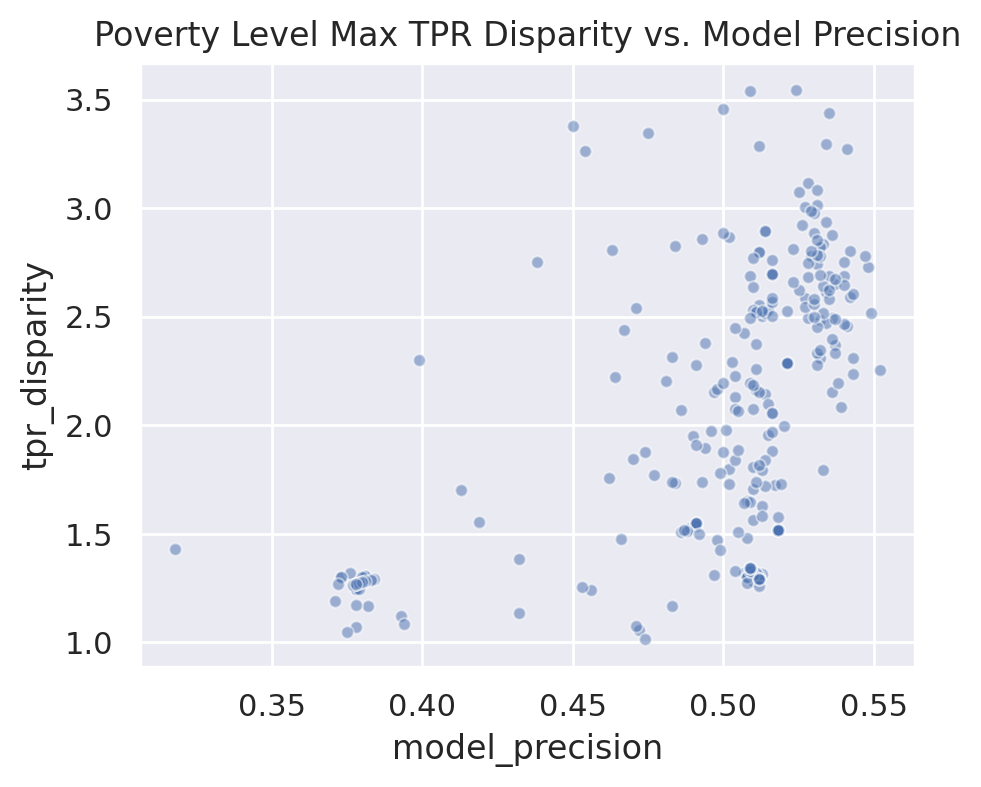

In [64]:
ax = sns.scatterplot(
    x='model_precision', y='tpr_disparity',#, hue='Model Type',# hue='model_type',
    data=scatter1,
    alpha=0.5, s=20,
)
ax.set_title('Poverty Level Max TPR Disparity vs. Model Precision', y=1.)

plt.gcf().set_size_inches((5, 4))
plt.gcf().set_dpi(DPI)
#plt.gcf().savefig(f'{NEW_IMGS_DIR}/fairness_vs_performance_density_per_model.png', dpi=DPI)
plt.show() 

In [71]:
poverty_min_tpr_df = aequitas_df[aequitas_df['attribute_name']=='poverty_level'].groupby(['model_uuid','attribute_name']).tpr.agg('min').to_frame().reset_index()


In [72]:
scatter2 = pd.merge(evals_df, poverty_min_tpr_df, how='left', on=['model_uuid'], left_index=True, sort=True, copy=True)


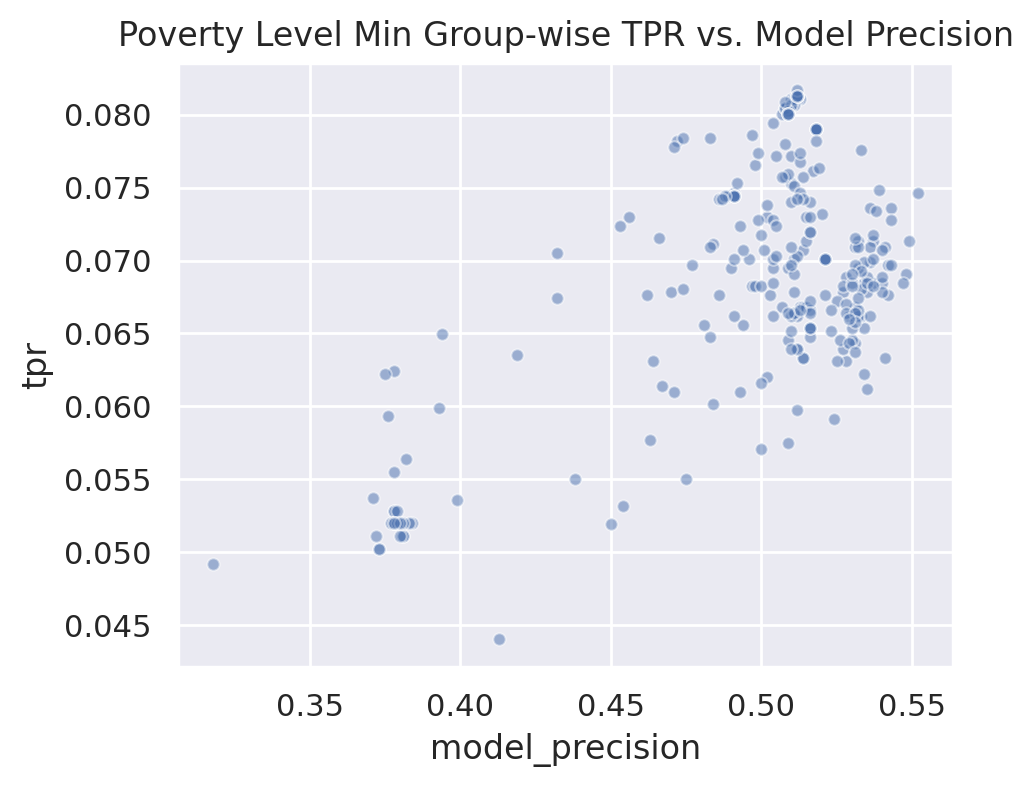

In [94]:
ax = sns.scatterplot(
    x='model_precision', y='tpr',
    
    data=scatter2,
    alpha=0.5, s=20,
)
ax.set_title('Poverty Level Min Group-wise TPR vs. Model Precision', y=1.)

plt.gcf().set_size_inches((5, 4))
plt.gcf().set_dpi(DPI)
#plt.gcf().savefig(f'{NEW_IMGS_DIR}/fairness_vs_performance_density_per_model.png', dpi=DPI)
plt.show() 

In [75]:
scatter2.sort_values('tpr', ascending=False)

,model_precision,model_classpath,hyperparameters,model_uuid,predictions_uuid,target_pp,matrix_type,matrix_start_date,matrix_end_date,attribute_name,tpr
174.0,0.512,sklearn.linear_model.LogisticRegression,"{""C"": 0.001, ""tol"": 0.003520385703073996, ""n_j...",9aa153088e79c7350367b60e98850c1a,c82f0f754b815c00b6bc6c196dfc9769,1000,test,2012-12-01,2013-01-31,poverty_level,0.081696
64.0,0.512,sklearn.linear_model.LogisticRegression,"{""C"": 0.01, ""tol"": 0.0031093770352482626, ""n_j...",3277339b850e46fcbf036633ad529492,ccf21616a719b39013581643ca0d0e57,1000,test,2012-12-01,2013-01-31,poverty_level,0.081282
94.0,0.512,sklearn.linear_model.LogisticRegression,"{""C"": 0.1, ""tol"": 0.0035025974320409534, ""n_jo...",469229b79b0c150e2db00aa671e2951b,018adc4e81deed78dae073b76babead8,1000,test,2012-12-01,2013-01-31,poverty_level,0.081282
220.0,0.512,sklearn.linear_model.LogisticRegression,"{""C"": 0.001, ""tol"": 0.003297030431191763, ""n_j...",c5effd78c1d6bd670aa39c57f1645713,c2715ca798c21adb2054b66b68005e4f,1000,test,2012-12-01,2013-01-31,poverty_level,0.081282
158.0,0.512,sklearn.linear_model.LogisticRegression,"{""C"": 0.1, ""tol"": 0.0023465633846807775, ""n_jo...",87112fbcaa08e1452d82accda638c9ec,345d12c5f292aac0f3e34340578ae630,1000,test,2012-12-01,2013-01-31,poverty_level,0.081282
...,...,...,...,...,...,...,...,...,...,...,...
NaN,0.492,lightgbm.LGBMClassifier,"{""n_jobs"": -1, ""max_depth"": 30, ""num_leaves"": ...",f8b2c67bfb1018fc6f0c91974e2217b8,c200a158a135cacf3421c3fa833da132,1000,test,2012-12-01,2013-01-31,NaN,NaN
NaN,0.511,sklearn.neural_network.MLPClassifier,"{""alpha"": 0.00009139211146991318, ""beta_1"": 0....",fdf71e32759084b1b0bed1124078d8ff,642aeae48def207837dbc23dfb073342,1000,test,2012-12-01,2013-01-31,NaN,NaN
NaN,0.503,lightgbm.LGBMClassifier,"{""n_jobs"": -1, ""max_depth"": 70, ""num_leaves"": ...",fe4fdd107751e414542f341c78365027,9736e2055a7cd4edcb71d15f662d8faf,1000,test,2012-12-01,2013-01-31,NaN,NaN
NaN,0.523,lightgbm.LGBMClassifier,"{""n_jobs"": -1, ""max_depth"": 2, ""num_leaves"": 2...",ff36f143d6baee9b3efa6883b7101f60,6948a021deb2b219d45c7b355d74fb13,1000,test,2012-12-01,2013-01-31,NaN,NaN


In [84]:
aequitas_df.loc[(aequitas_df['model_uuid']=='9aa153088e79c7350367b60e98850c1a') & (aequitas_df['attribute_name']=='poverty_level')]

,model_uuid,predictions_uuid,k,attribute_name,attribute_value,tpr,tpr_disparity,tpr_ref_group_value,pp,tp,group_label_pos,prev,group_size,matrix_type,matrix_start_date,matrix_end_date
1126,9aa153088e79c7350367b60e98850c1a,c82f0f754b815c00b6bc6c196dfc9769,1000,poverty_level,low_moderate,0.103084,1.261797,high,313,117,1135,0.349338,3249,test,2012-12-01,2013-01-31
1127,9aa153088e79c7350367b60e98850c1a,c82f0f754b815c00b6bc6c196dfc9769,1000,poverty_level,high,0.081696,1.000000,high,687,395,4835,0.335112,14428,test,2012-12-01,2013-01-31


In [95]:
teacher_sex_tpr_disparity_df = aequitas_df[aequitas_df['attribute_name']=='teacher_sex'].groupby(['model_uuid','attribute_name']).tpr_disparity.agg('max').to_frame().reset_index()

In [98]:
scatter3 = pd.merge(evals_df, teacher_sex_tpr_disparity_df, how='left', on=['model_uuid'], left_index=True, sort=True, copy=True)


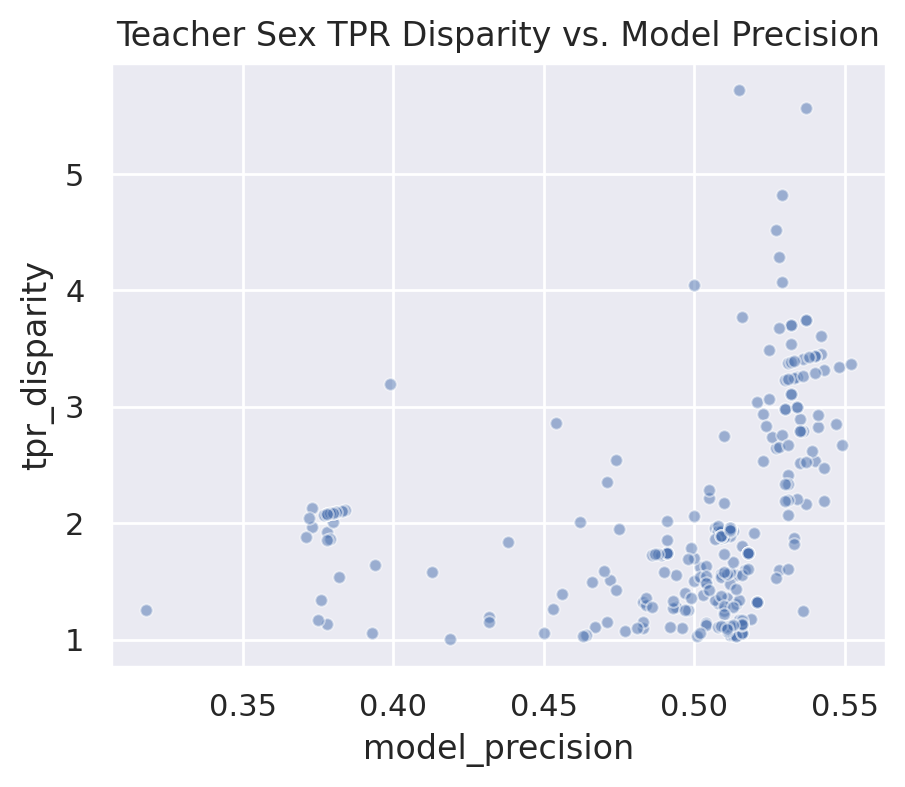

In [99]:
ax = sns.scatterplot(
    x='model_precision', y='tpr_disparity',
    
    data=scatter3,
    alpha=0.5, s=20,
)
ax.set_title('Teacher Sex TPR Disparity vs. Model Precision', y=1.)

plt.gcf().set_size_inches((5, 4))
plt.gcf().set_dpi(DPI)
#plt.gcf().savefig(f'{NEW_IMGS_DIR}/fairness_vs_performance_density_per_model.png', dpi=DPI)
plt.show() 

In [104]:
scatter3.loc[(scatter3['model_precision'] > 0.53) & (scatter3['tpr_disparity'] < 1.3)].sort_values('model_precision', ascending=False)

,model_precision,model_classpath,hyperparameters,model_uuid,predictions_uuid,target_pp,matrix_type,matrix_start_date,matrix_end_date,attribute_name,tpr_disparity
92.0,0.536,sklearn.neural_network.MLPClassifier,"{""alpha"": 0.00016633092978140688, ""beta_1"": 0....",44e6d311dec67b33677d42836f38ad32,854de2c0c632395d508c7fd9ec3500ce,1000,test,2012-12-01,2013-01-31,teacher_sex,1.245115


In [109]:
metro_type_tpr_disparity_df = aequitas_df[aequitas_df['attribute_name']=='metro_type'].groupby(['model_uuid','attribute_name']).tpr_disparity.agg('max').to_frame().reset_index()

In [110]:
scatter4 = pd.merge(evals_df, metro_type_tpr_disparity_df, how='left', on=['model_uuid'], left_index=True, sort=True, copy=True)


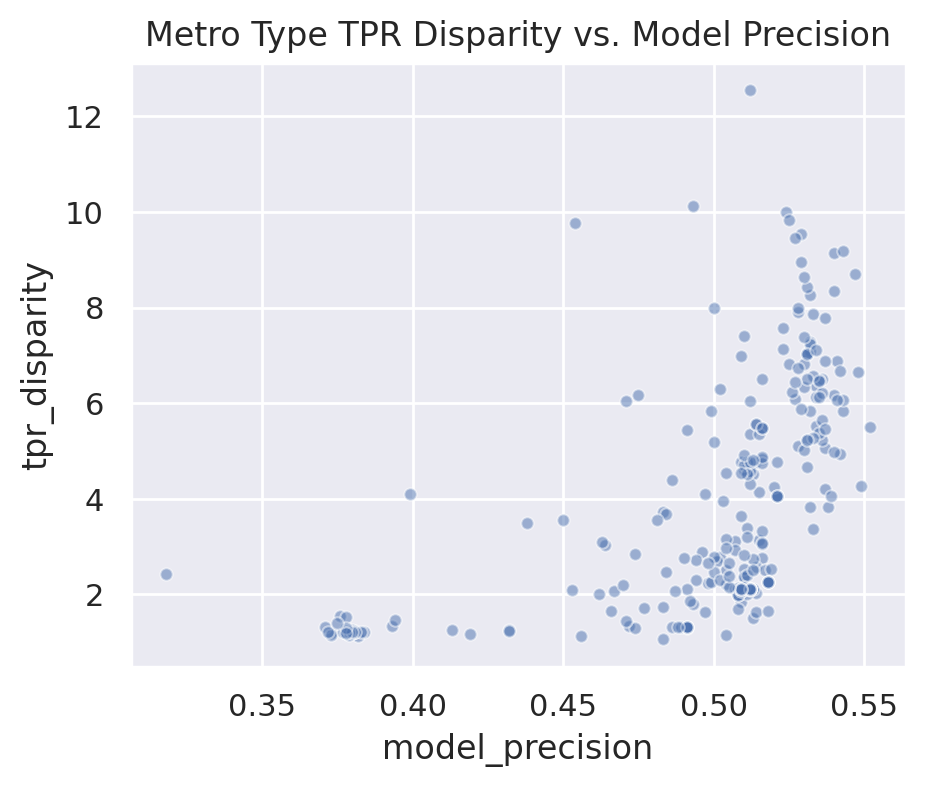

In [111]:
ax = sns.scatterplot(
    x='model_precision', y='tpr_disparity',
    
    data=scatter4,
    alpha=0.5, s=20,
)
ax.set_title('Metro Type TPR Disparity vs. Model Precision', y=1.)

plt.gcf().set_size_inches((5, 4))
plt.gcf().set_dpi(DPI)
#plt.gcf().savefig(f'{NEW_IMGS_DIR}/fairness_vs_performance_density_per_model.png', dpi=DPI)
plt.show() 

In [114]:
aequitas_df.loc[(aequitas_df['model_uuid']=='a04e2eedd9c5ff18bcf77e84ae9db561') & (aequitas_df['attribute_name']=='metro_type')]

,model_uuid,predictions_uuid,k,attribute_name,attribute_value,tpr,tpr_disparity,tpr_ref_group_value,pp,tp,group_label_pos,prev,group_size,matrix_type,matrix_start_date,matrix_end_date
4,a04e2eedd9c5ff18bcf77e84ae9db561,c598fbe93f4c218ac7d325fb478598f1,1000,metro_type,rural,0.235152,5.510384,urban,367,194,825,0.417088,1978,test,2012-12-01,2013-01-31
5,a04e2eedd9c5ff18bcf77e84ae9db561,c598fbe93f4c218ac7d325fb478598f1,1000,metro_type,suburban,0.088648,2.077317,urban,259,139,1568,0.346290,4528,test,2012-12-01,2013-01-31
6,a04e2eedd9c5ff18bcf77e84ae9db561,c598fbe93f4c218ac7d325fb478598f1,1000,metro_type,urban,0.042674,1.000000,urban,192,120,2812,0.308502,9115,test,2012-12-01,2013-01-31
